In [14]:
from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
#필요한 라이브러리들을 임포트한다.

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#한글 출력시 오류가 날 때 추가하는 코드

from sklearn.neighbors import KNeighborsRegressor
# KNeighborRegressor를 임포트한다.

from sklearn.model_selection import train_test_split
# train_test_split를 임포트한다.

from sklearn.datasets import load_boston

from sklearn.linear_model import Lasso

boston = load_boston()

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {}\n".format(np.sum(lasso.coef_ !=0)))
#alpha = 1
#낮은 성능, 적은 특성 사용
#과소적합

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: {}\n".format(np.sum(lasso001.coef_ !=0)))
#alpha = 0.01
#패널티 효과 감소, 복잡도 증가

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: {}\n".format(np.sum(lasso001.coef_ !=0)))
#alpha를 아주 작게 하게 되면 선형모델과 유사해진다.

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}\n".format(ridge01.score(X_test, y_test)))

print("계수값:\n", lasso.coef_)
print(np.where(lasso.coef_ != 0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 33

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77

계수값:
 [-0.     0.    -0.     0.    -0.     0.    -0.     0.    -0.    -0.
 -0.     0.    -5.353 -0.     0.    -0.     0.    -0.    -0.    -0.
 -0.    -0.    -0.    -0.    -0.    -0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.    -0.     0.
 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.    -0.    -0.
 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.     0.     0.
  0.    -0.    -0.    -0.     0.    -0.    -0.     0.    -0.    -1.051
 -3.31  -0.    -0.     0.    -0.    -0.    -0.     0.    -0.    -0.414
 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.
 -0.     0.    -0.    -0.   ]
(array([12, 79, 80, 89], dtype=int64),)


Text(0, 0.5, '계수 크기')

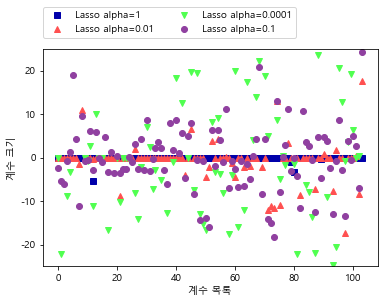

In [15]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
# alpha = 1
# 계수 대부분이 0, 나머지도 크기가 작다.

plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
# alpha = 0.01
# 많은 특성이 0이 된다.

plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
# alpha=0.0001
# 값이 커진다.
# 규제를 받지 않는다.

plt.plot(ridge01.coef_, 'o', label="Lasso alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")